In [3]:
%matplotlib inline

# Libraries for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [4]:
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


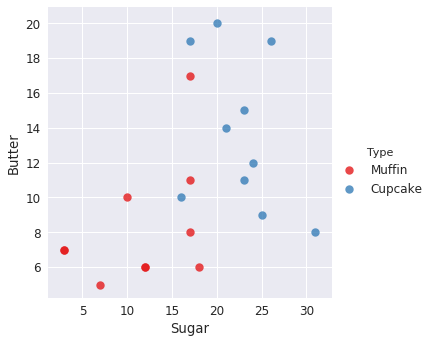

In [7]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [9]:
# specify inputs for the model
sugar_butter = recipes[['Sugar', 'Butter']].as_matrix()
type_label = np.where(recipes['Type'] =='Muffin', 0, 1)

In [10]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(sugar_butter, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# %time
# Get the separating Hyperplane
w =  model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

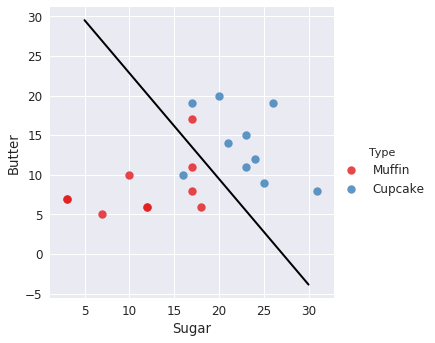

In [23]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

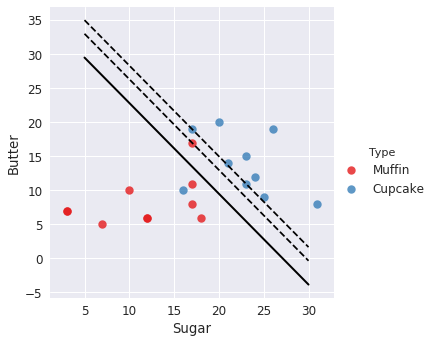

In [25]:
# Look at the margins and support vectors
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=8, facecolors='none')